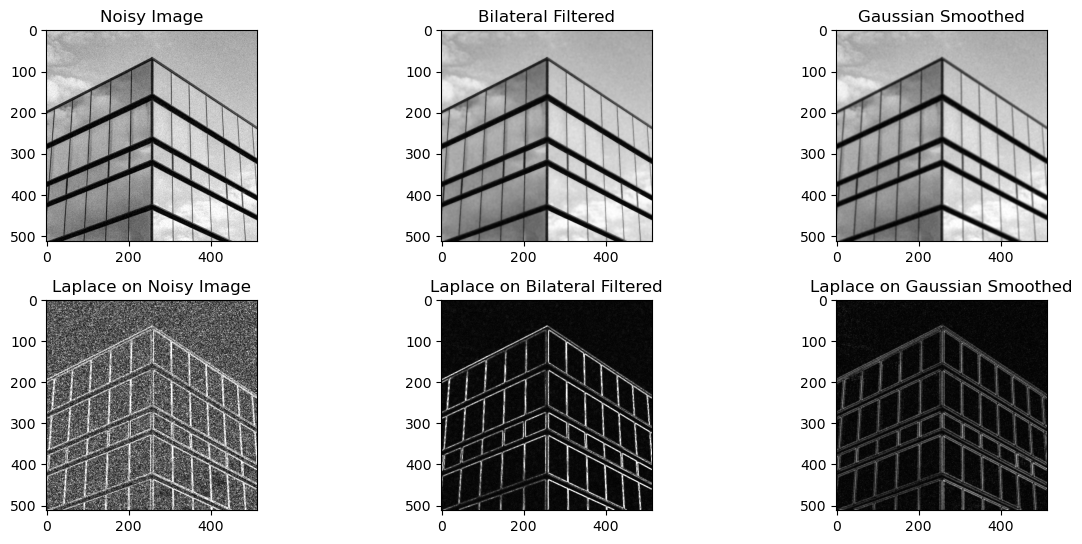

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the noisy image
image_path = 'building_noisy.png'  # Change to the path of your noisy image
noisy_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Parameters for the filters
bilateral_diameter = 7  # Diameter of each pixel neighborhood for bilateral filter
bilateral_sigma_color = 75  # Filter sigma in the color space
bilateral_sigma_space = 75  # Filter sigma in the coordinate space
gaussian_ksize = (7, 7)  # Kernel size for Gaussian filter
laplace_ksize = 3  # Kernel size for Laplace filter

# Apply Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(noisy_image, bilateral_diameter, bilateral_sigma_color, bilateral_sigma_space)

# Apply Gaussian Smoothing
gaussian_filtered = cv2.GaussianBlur(noisy_image, gaussian_ksize, 0)

# Apply Laplace Filter on original, bilateral filtered, and Gaussian filtered images
laplace_original = cv2.Laplacian(noisy_image, cv2.CV_64F, ksize=laplace_ksize)
laplace_bilateral = cv2.Laplacian(bilateral_filtered, cv2.CV_64F, ksize=laplace_ksize)
laplace_gaussian = cv2.Laplacian(gaussian_filtered, cv2.CV_64F, ksize=laplace_ksize)

# Convert Laplace images to 8-bit for consistent display
laplace_original = cv2.convertScaleAbs(laplace_original)
laplace_bilateral = cv2.convertScaleAbs(laplace_bilateral)
laplace_gaussian = cv2.convertScaleAbs(laplace_gaussian)

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.subplot(3, 3, 2), plt.imshow(bilateral_filtered, cmap='gray'), plt.title('Bilateral Filtered')
plt.subplot(3, 3, 3), plt.imshow(gaussian_filtered, cmap='gray'), plt.title('Gaussian Smoothed')

plt.subplot(3, 3, 4), plt.imshow(laplace_original, cmap='gray'), plt.title('Laplace on Noisy Image')
plt.subplot(3, 3, 5), plt.imshow(laplace_bilateral, cmap='gray'), plt.title('Laplace on Bilateral Filtered')
plt.subplot(3, 3, 6), plt.imshow(laplace_gaussian, cmap='gray'), plt.title('Laplace on Gaussian Smoothed')

plt.tight_layout()
plt.show()


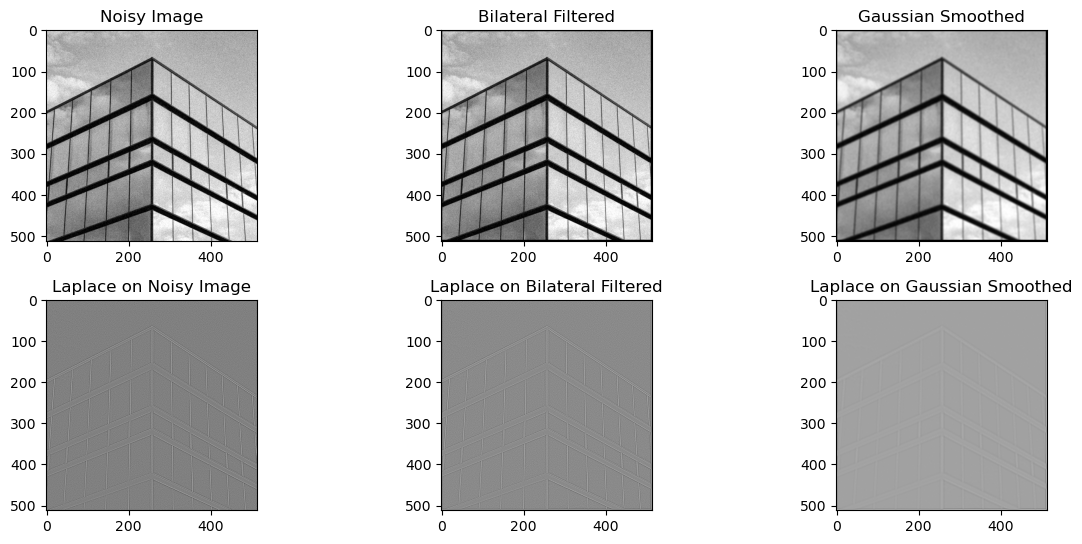

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image (assume it's already in grayscale)
image_path = 'building_noisy.png'  # Replace with the correct path
noisy_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
noisy_image = noisy_image.astype(np.float32)  # Convert to float for precision

# Parameters
window_size = 7
sigma_spatial = 40# Spatial standard deviation for bilateral
sigma_intensity = 2  # Intensity standard deviation for bilateral
sigma_gaussian = 2.0  # Standard deviation for Gaussian smoothing

# Generate spatial Gaussian kernel for Bilateral
def gaussian(x, y, sigma):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Apply Bilateral Filter manually
def bilateral_filter(image, diameter, sigma_spatial, sigma_intensity):
    filtered_image = np.zeros_like(image)
    half_d = diameter // 2
    for i in range(half_d, image.shape[0] - half_d):
        for j in range(half_d, image.shape[1] - half_d):
            wp = 0
            I_filtered = 0
            for k in range(-half_d, half_d + 1):
                for l in range(-half_d, half_d + 1):
                    # Spatial Gaussian
                    gs = gaussian(k, l, sigma_spatial)
                    
                    # Range Gaussian
                    gr = np.exp(-((image[i + k, j + l] - image[i, j]) ** 2) / (2 * sigma_intensity ** 2))
                    
                    # Weight
                    w = gs * gr
                    wp += w
                    I_filtered += w * image[i + k, j + l]
            filtered_image[i, j] = I_filtered / wp
    return filtered_image

# Apply Gaussian filter manually
def gaussian_filter(image, diameter, sigma):
    filtered_image = np.zeros_like(image)
    half_d = diameter // 2
    # Precompute Gaussian kernel
    kernel = np.zeros((diameter, diameter))
    for x in range(-half_d, half_d + 1):
        for y in range(-half_d, half_d + 1):
            kernel[x + half_d, y + half_d] = gaussian(x, y, sigma)
    kernel /= kernel.sum()  # Normalize

    # Convolution with Gaussian kernel
    for i in range(half_d, image.shape[0] - half_d):
        for j in range(half_d, image.shape[1] - half_d):
            region = image[i - half_d:i + half_d + 1, j - half_d:j + half_d + 1]
            filtered_image[i, j] = np.sum(region * kernel)
    return filtered_image

# Apply Laplace filter manually
def laplace_filter(image):
    laplace_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    filtered_image = np.zeros_like(image)
    half_d = 1  # 3x3 kernel has a radius of 1
    for i in range(half_d, image.shape[0] - half_d):
        for j in range(half_d, image.shape[1] - half_d):
            region = image[i - half_d:i + half_d + 1, j - half_d:j + half_d + 1]
            filtered_image[i, j] = np.sum(region * laplace_kernel)
    return (filtered_image)

# Apply the filters
bilateral_filtered = bilateral_filter(noisy_image, window_size, sigma_spatial, sigma_intensity)
gaussian_filtered = gaussian_filter(noisy_image, window_size, sigma_gaussian)
laplace_noisy = laplace_filter(noisy_image)
laplace_bilateral = laplace_filter(bilateral_filtered)
laplace_gaussian = laplace_filter(gaussian_filtered)

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.subplot(3, 3, 2), plt.imshow(bilateral_filtered, cmap='gray'), plt.title('Bilateral Filtered')
plt.subplot(3, 3, 3), plt.imshow(gaussian_filtered, cmap='gray'), plt.title('Gaussian Smoothed')

plt.subplot(3, 3, 4), plt.imshow(laplace_noisy, cmap='gray'), plt.title('Laplace on Noisy Image')
plt.subplot(3, 3, 5), plt.imshow(laplace_bilateral, cmap='gray'), plt.title('Laplace on Bilateral Filtered')
plt.subplot(3, 3, 6), plt.imshow(laplace_gaussian, cmap='gray'), plt.title('Laplace on Gaussian Smoothed')

plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load the image (assume it's already in grayscale)
image_path = 'building_noisy.png'  # Replace with the correct path
noisy_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
noisy_image = noisy_image.astype(np.float32)  # Convert to float for precision

# Parameters
window_size = 7
sigma_spatial = 10.0  # Spatial standard deviation for bilateral
sigma_intensity = 50.0  # Intensity standard deviation for bilateral
sigma_gaussian = 1.0  # Standard deviation for Gaussian smoothing

# Generate Gaussian kernel
def create_gaussian_kernel(size, sigma):
    """Generates a Gaussian kernel."""
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

# Apply Bilateral Filter manually
def bilateral_filter(image, diameter, sigma_spatial, sigma_intensity):
    filtered_image = np.zeros_like(image)
    half_d = diameter // 2
    for i in range(half_d, image.shape[0] - half_d):
        for j in range(half_d, image.shape[1] - half_d):
            wp = 0
            I_filtered = 0
            for k in range(-half_d, half_d + 1):
                for l in range(-half_d, half_d + 1):
                    # Spatial Gaussian
                    gs = np.exp(-(k**2 + l**2) / (2 * sigma_spatial ** 2))
                    
                    # Range Gaussian
                    gr = np.exp(-((image[i + k, j + l] - image[i, j]) ** 2) / (2 * sigma_intensity ** 2))
                    
                    # Weight
                    w = gs * gr
                    wp += w
                    I_filtered += w * image[i + k, j + l]
            filtered_image[i, j] = I_filtered / wp
    return filtered_image

# Apply Gaussian filter using convolve
gaussian_kernel = create_gaussian_kernel(window_size, sigma_gaussian)
gaussian_filtered = convolve(noisy_image, gaussian_kernel)

# Laplace Kernel
laplace_kernel = np.array([[0, 1, 0], 
                           [1, -4, 1], 
                           [0, 1, 0]])

# Apply Laplace filter using convolve
laplace_noisy = convolve(noisy_image, laplace_kernel)
laplace_bilateral = convolve(bilateral_filter(noisy_image, window_size, sigma_spatial, sigma_intensity), laplace_kernel)
laplace_gaussian = convolve(gaussian_filtered, laplace_kernel)

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.subplot(3, 3, 2), plt.imshow(bilateral_filter(noisy_image, window_size, sigma_spatial, sigma_intensity), cmap='gray'), plt.title('Bilateral Filtered')
plt.subplot(3, 3, 3), plt.imshow(gaussian_filtered, cmap='gray'), plt.title('Gaussian Smoothed')

plt.subplot(3, 3, 4), plt.imshow(np.abs(laplace_noisy), cmap='gray'), plt.title('Laplace on Noisy Image')
plt.subplot(3, 3, 5), plt.imshow(np.abs(laplace_bilateral), cmap='gray'), plt.title('Laplace on Bilateral Filtered')
plt.subplot(3, 3, 6), plt.imshow(np.abs(laplace_gaussian), cmap='gray'), plt.title('Laplace on Gaussian Smoothed')

plt.tight_layout()
plt.show()


AttributeError: 'NoneType' object has no attribute 'astype'

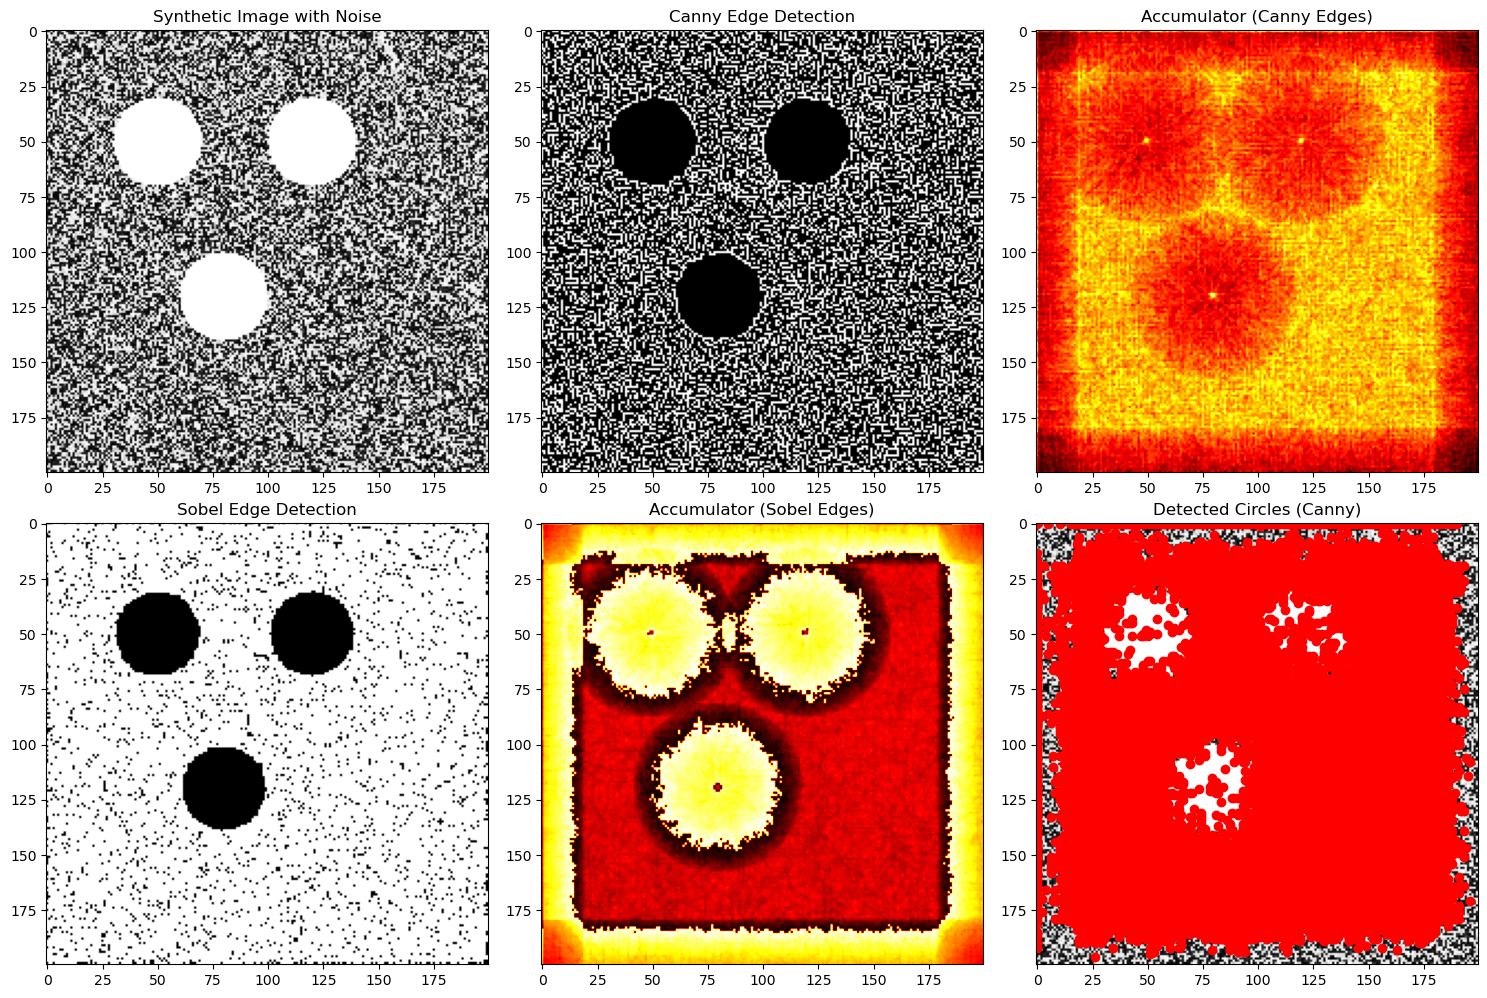

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic image with circles
def create_circle_image(radius, centers, size=(200, 200), noise_std=0):
    image = np.zeros(size, dtype=np.uint8)
    for center in centers:
        cv2.circle(image, center, radius, 255, thickness=-1)  # Filled circle
    # Add Gaussian noise
    if noise_std > 0:
        noise = np.random.normal(0, noise_std, image.shape).astype(np.uint8)
        image = cv2.add(image, noise)
    return image

# Hough Transform for Circles
def hough_circle_transform(edges, radius, threshold=100):
    accumulator = np.zeros_like(edges)
    theta = np.arange(0, 360) * np.pi / 180
    for y in range(edges.shape[0]):
        for x in range(edges.shape[1]):
            if edges[y, x] > 0:
                for angle in theta:
                    a = int(x - radius * np.cos(angle))
                    b = int(y - radius * np.sin(angle))
                    if 0 <= a < accumulator.shape[1] and 0 <= b < accumulator.shape[0]:
                        accumulator[b, a] += 1
    # Threshold accumulator to find potential circle centers
    circle_centers = np.argwhere(accumulator > threshold)
    return accumulator, circle_centers

# Detect edges using Canny and Sobel edge detectors
def detect_edges(image, method="canny", **kwargs):
    if method == "canny":
        return cv2.Canny(image, kwargs.get('low_threshold', 50), kwargs.get('high_threshold', 150))
    elif method == "sobel":
        grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
        return (gradient_magnitude > kwargs.get('sobel_threshold', 100)).astype(np.uint8) * 255
    return None

# Test the Hough Circle Transform
radius = 20
image_size = (200, 200)
circle_centers = [(50, 50), (120, 50), (80, 120)]
noise_std = 30

# Create synthetic image with circles and noise
synthetic_image = create_circle_image(radius, circle_centers, size=image_size, noise_std=noise_std)

# Edge detection
edges_canny = detect_edges(synthetic_image, method="canny", low_threshold=50, high_threshold=150)
edges_sobel = detect_edges(synthetic_image, method="sobel", sobel_threshold=100)

# Hough Transform for Canny edges
accumulator_canny, detected_centers_canny = hough_circle_transform(edges_canny, radius)

# Hough Transform for Sobel edges
accumulator_sobel, detected_centers_sobel = hough_circle_transform(edges_sobel, radius)

# Plot results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(synthetic_image, cmap='gray')
axes[0, 0].set_title("Synthetic Image with Noise")

axes[0, 1].imshow(edges_canny, cmap='gray')
axes[0, 1].set_title("Canny Edge Detection")

axes[0, 2].imshow(accumulator_canny, cmap='hot')
axes[0, 2].set_title("Accumulator (Canny Edges)")

axes[1, 0].imshow(edges_sobel, cmap='gray')
axes[1, 0].set_title("Sobel Edge Detection")

axes[1, 1].imshow(accumulator_sobel, cmap='hot')
axes[1, 1].set_title("Accumulator (Sobel Edges)")

axes[1, 2].imshow(synthetic_image, cmap='gray')
for center in detected_centers_canny:
    axes[1, 2].plot(center[1], center[0], 'ro')
axes[1, 2].set_title("Detected Circles (Canny)")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load the image (ensure it's grayscale)
image_path = 'building_noisy.png'  # Replace with the correct path to your image
noisy_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if noisy_image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

noisy_image = noisy_image.astype(np.float32)  # Convert to float for precision

# Parameters
window_size = 7
sigma_spatial = 10.0  # Spatial standard deviation for bilateral
sigma_intensity = 50.0  # Intensity standard deviation for bilateral
sigma_gaussian = 1.0  # Standard deviation for Gaussian smoothing

# Generate Gaussian kernel
def create_gaussian_kernel(size, sigma):
    """Generates a Gaussian kernel."""
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

# Apply Bilateral Filter manually
def bilateral_filter(image, diameter, sigma_spatial, sigma_intensity):
    filtered_image = np.zeros_like(image)
    half_d = diameter // 2
    for i in range(half_d, image.shape[0] - half_d):
        for j in range(half_d, image.shape[1] - half_d):
            wp = 0
            I_filtered = 0
            for k in range(-half_d, half_d + 1):
                for l in range(-half_d, half_d + 1):
                    # Spatial Gaussian
                    gs = np.exp(-(k**2 + l**2) / (2 * sigma_spatial ** 2))
                    
                    # Range Gaussian
                    gr = np.exp(-((image[i + k, j + l] - image[i, j]) ** 2) / (2 * sigma_intensity ** 2))
                    
                    # Weight
                    w = gs * gr
                    wp += w
                    I_filtered += w * image[i + k, j + l]
            filtered_image[i, j] = I_filtered / wp
    return filtered_image

# Apply Gaussian filter using convolve
gaussian_kernel = create_gaussian_kernel(window_size, sigma_gaussian)
gaussian_filtered = convolve(noisy_image, gaussian_kernel)

# Laplace Kernel
laplace_kernel = np.array([[0, 1, 0], 
                           [1, -4, 1], 
                           [0, 1, 0]])

# Apply Laplace filter using convolve
laplace_noisy = convolve(noisy_image, laplace_kernel)
laplace_bilateral = convolve(bilateral_filter(noisy_image, window_size, sigma_spatial, sigma_intensity), laplace_kernel)
laplace_gaussian = convolve(gaussian_filtered, laplace_kernel)

# Normalize images for display purposes
def normalize_image(image):
    """Normalizes an image to the range 0-255 for display."""
    image = image - image.min()  # Shift min to 0
    return (255 * image / image.max()).astype(np.uint8)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.imshow(normalize_image(noisy_image), cmap='gray')
plt.title('Noisy Image')

plt.subplot(3, 3, 2)
plt.imshow(normalize_image(bilateral_filter(noisy_image, window_size, sigma_spatial, sigma_intensity)), cmap='gray')
plt.title('Bilateral Filtered')

plt.subplot(3, 3, 3)
plt.imshow(normalize_image(gaussian_filtered), cmap='gray')
plt.title('Gaussian Smoothed')

plt.subplot(3, 3, 4)
plt.imshow(normalize_image(np.abs(laplace_noisy)), cmap='gray')
plt.title('Laplace on Noisy Image')

plt.subplot(3, 3, 5)
plt.imshow(normalize_image(np.abs(laplace_bilateral)), cmap='gray')
plt.title('Laplace on Bilateral Filtered')

plt.subplot(3, 3, 6)
plt.imshow(normalize_image(np.abs(laplace_gaussian)), cmap='gray')
plt.title('Laplace on Gaussian Smoothed')

plt.tight_layout()
plt.show()
